In [23]:
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
genres_path = "/Users/zzyun/Documents/GitHub/csc369/individualanalysis/genres.csv"
movies_path = "/Users/zzyun/Documents/GitHub/csc369/individualanalysis/movies.csv"
themes_path = "/Users/zzyun/Documents/GitHub/csc369/individualanalysis/themes.csv"

In [92]:
conn = duckdb.connect(database=':memory:')

In [93]:
conn.execute(f"CREATE TABLE genres_df AS SELECT * FROM read_csv('{genres_path}');")
conn.execute(f"CREATE TABLE movies_df AS SELECT * FROM read_csv('{movies_path}');")
conn.execute(f"CREATE TABLE themes_df AS SELECT * FROM read_csv('{themes_path}');")

In [94]:
conn.execute (f"""CREATE TABLE genres_themes_movies AS SELECT movies_df.*, genres_df.*, themes_df.* 
              FROM movies_df 
              INNER JOIN genres_df ON (movies_df.id = genres_df.id)
              INNER JOIN themes_df ON (movies_df.id = themes_df.id);""")

Average movie length across genre:

In [97]:
average_time_by_genre = conn.execute("""
    SELECT genre, AVG(minute) AS av_length
    FROM genres_themes_movies
    GROUP BY genre
""").fetch_df()
average_time_by_genre

,genre,av_length
0,Action,108.934301
1,War,121.035244
2,Thriller,103.686877
3,Comedy,114.640663
4,TV Movie,96.538700
5,Animation,137.094978
6,Romance,108.946046
7,Drama,136.707177
8,Crime,126.171165
9,Fantasy,102.372638


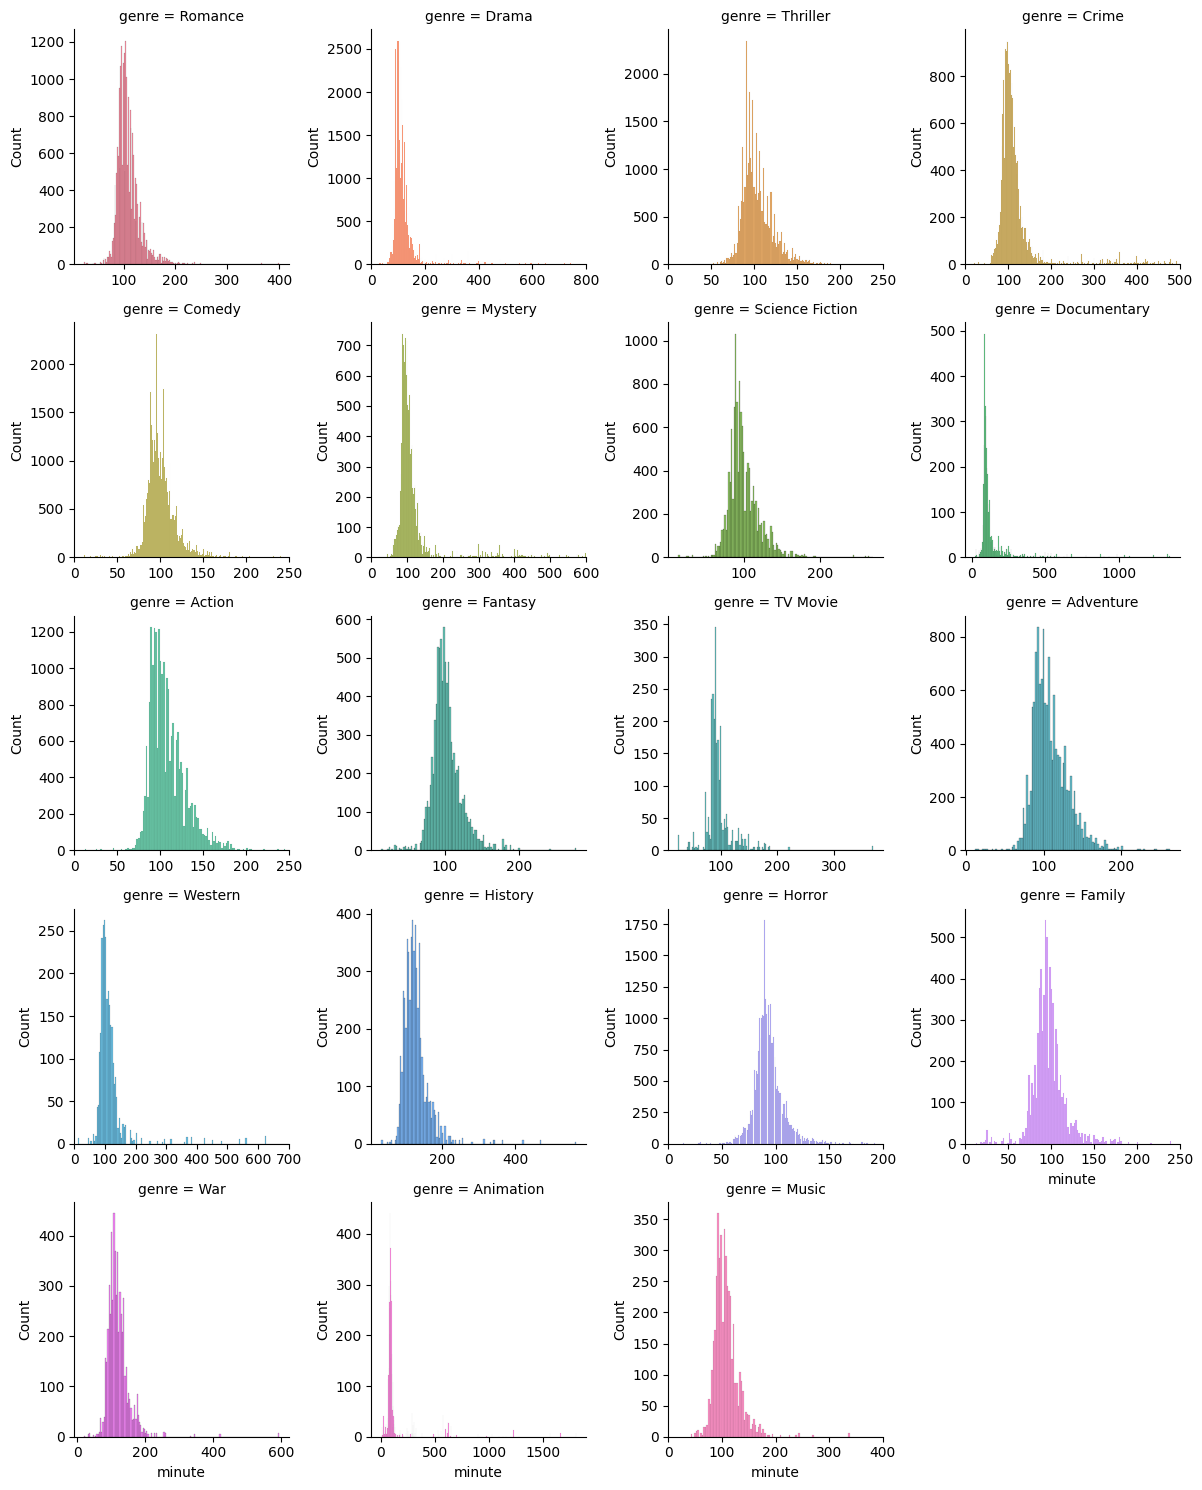

In [106]:
graph = sns.FacetGrid(genres_themes_movies_df, col="genre", col_wrap=4, sharex=False, sharey=False, hue="genre")
graph.map_dataframe(sns.histplot, x="minute")
for genre, ax in graph.axes_dict.items():
    if genre == "Drama":
        ax.set_xlim(0, 800)
        ax.set_xticks([0, 200, 400, 600, 800])
    elif genre == "Thriller":
        ax.set_xlim(0, 250)
        ax.set_xticks([0, 50, 100, 150, 200, 250])
    elif genre == "Crime":
        ax.set_xlim(0, 500)
        ax.set_xticks([0, 100, 200, 300, 400, 500])
    elif genre == "Comedy":
        ax.set_xlim(0, 250)
        ax.set_xticks([0, 50, 100, 150, 200, 250])
    elif genre == "Mystery":
        ax.set_xlim(0, 600)
        ax.set_xticks([0, 100, 200, 300, 400, 500, 600])
    elif genre == "Action":
        ax.set_xlim(0, 250)
        ax.set_xticks([0, 50, 100, 150, 200, 250])
    elif genre == "Western":
        ax.set_xlim(0, 700)
        ax.set_xticks([0, 100, 200, 300, 400, 500, 600, 700])
    elif genre == "Horror":
        ax.set_xlim(0, 200)
        ax.set_xticks([0, 50, 100, 150, 200])
    elif genre == "Family":
        ax.set_xlim(0, 250)
        ax.set_xticks([0, 50, 100, 150, 200, 250])
    elif genre == "Music":
        ax.set_xlim(0, 400)
        ax.set_xticks([0, 100, 200, 300, 400])

plt.show()

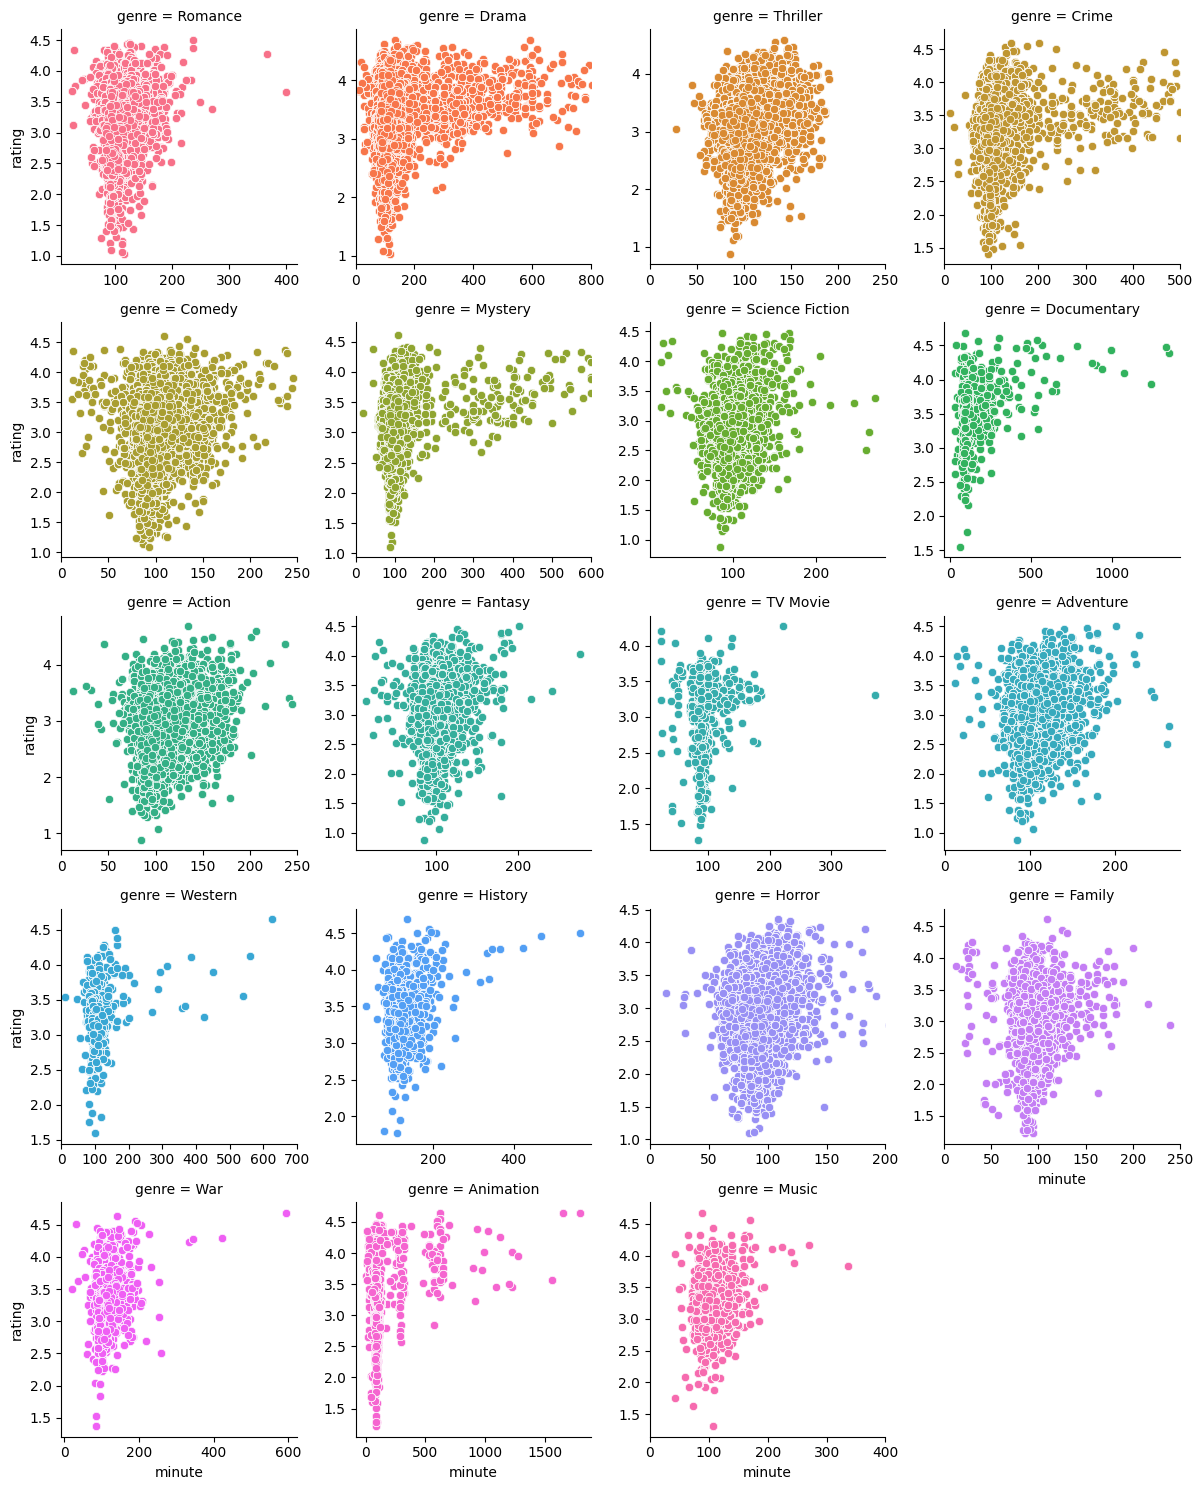

In [110]:
g = sns.FacetGrid(genres_themes_movies_df, col="genre", col_wrap=4, sharex=False, sharey=False, hue="genre")
g.map_dataframe(sns.scatterplot, x="minute", y="rating")
for genre, ax in g.axes_dict.items():
    if genre == "Drama":
        ax.set_xlim(0, 800)
        ax.set_xticks([0, 200, 400, 600, 800])
    elif genre == "Thriller":
        ax.set_xlim(0, 250)
        ax.set_xticks([0, 50, 100, 150, 200, 250])
    elif genre == "Crime":
        ax.set_xlim(0, 500)
        ax.set_xticks([0, 100, 200, 300, 400, 500])
    elif genre == "Comedy":
        ax.set_xlim(0, 250)
        ax.set_xticks([0, 50, 100, 150, 200, 250])
    elif genre == "Mystery":
        ax.set_xlim(0, 600)
        ax.set_xticks([0, 100, 200, 300, 400, 500, 600])
    elif genre == "Action":
        ax.set_xlim(0, 250)
        ax.set_xticks([0, 50, 100, 150, 200, 250])
    elif genre == "Western":
        ax.set_xlim(0, 700)
        ax.set_xticks([0, 100, 200, 300, 400, 500, 600, 700])
    elif genre == "Horror":
        ax.set_xlim(0, 200)
        ax.set_xticks([0, 50, 100, 150, 200])
    elif genre == "Family":
        ax.set_xlim(0, 250)
        ax.set_xticks([0, 50, 100, 150, 200, 250])
    elif genre == "Music":
        ax.set_xlim(0, 400)
        ax.set_xticks([0, 100, 200, 300, 400])
plt.show()